In [81]:
import numpy as np
import json
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
class ActivationFunction:
    def __init__(self, activation_function):
        if activation_function == 'sigmoid':
            self.function = lambda net: 1 / (1 + np.exp(-net))
        elif activation_function == 'relu':
            self.function = lambda net: np.maximum(0, net)
        elif activation_function == 'linear':
            self.function = lambda net: net
        elif activation_function == 'softmax':
            self.function = lambda net: np.exp(net) / np.sum(np.exp(net))

    def get_activation_function(self):
        return self.function

In [3]:
activation = [
    'relu',
    'sigmoid',
    'linear',
    'softmax',
]

In [6]:
class Layer:
    def __init__(self, neuron: int, activation_function: str, weights: np.array, bias: np.array):
        self.neuron = neuron
        self.weights = weights
        self.bias = bias
        if activation_function not in activation:
            raise Exception('Invalid activation function')
        else:
            self.activation_function = activation_function
            self.function = ActivationFunction(activation_function).get_activation_function()

    def forward(self, input: np.array):
        output = self.function(np.dot(input, self.weights) + self.bias)
        return output

In [7]:
class FFNN:
    def __init__(self):
        self.layers = []

    def add_layer(self, layer: Layer):
        self.layers.append(layer)

    def forward(self, input: np.array):
        output = input
        for layer in self.layers:
            output = layer.forward(output)
        return output

In [30]:
model = open(f'../../Bagian-A/test/multilayer.json', 'r')
model = json.load(model)

layers = model['case']['model']['layers']
weights = model['case']['weights']

ffnn = FFNN()
for i in range (len(layers)):
    layer = layers[i]
    weight = weights[i]
    ffnn.add_layer(Layer(layer["number_of_neurons"], layer["activation_function"], np.array(weight[1:]), np.array(weight[0])))

input = model["case"]["input"]

output = ffnn.forward(input).tolist()
expected_output = model['expect']['output']

print(f'output: {output}')
print(f'expected output: {expected_output}')

output: [[0.4846748017763878]]
expected output: [[0.4846748]]


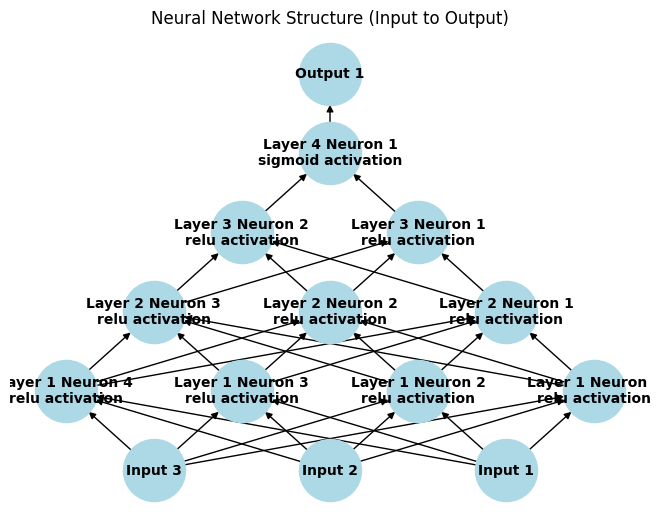

In [99]:
model_input = open(f'../../Bagian-A/test/multilayer.json', 'r')
model_data = json.load(model_input)

layers_data = model_data['case']['model']['layers']
weights_data = model_data['case']['weights']

# Initialize FFNN and add layers
ffnn = FFNN()
for i in range(len(layers_data)):
    layer_data = layers_data[i]
    weight_data = weights_data[i]
    layer = Layer(layer_data["number_of_neurons"], layer_data["activation_function"], np.array(weight_data[1:]), np.array(weight_data[0]))
    ffnn.add_layer(layer)

# Initialize a directed graph for visualization
G = nx.DiGraph()

# Add input nodes
input_nodes = model_data['case']['input']
G.add_nodes_from([f'Input {i+1}' for i in range(len(input_nodes[0]))], layer=0)

# Add nodes for each layer with the subset key
for i, layer_data in enumerate(layers_data):
    G.add_nodes_from([f'Layer {i+1} Neuron {j+1}\n{layer_data["activation_function"]} activation' for j in range(layer_data["number_of_neurons"])], layer=i+1)

# Add output nodes
output_nodes = model_data['expect']['output']
G.add_nodes_from([f'Output {i+1}' for i in range(len(output_nodes[0]))], layer=len(layers_data)+1)

# Add edges from input to first layer
for i in range(len(input_nodes[0])):
    for j in range(layers_data[0]["number_of_neurons"]):
        G.add_edge(f'Input {i+1}', f'Layer 1 Neuron {j+1}\n{layers_data[0]["activation_function"]} activation')

# Add edges within each layer
for i in range(len(layers_data) - 1):
    for j in range(layers_data[i]["number_of_neurons"]):
        for k in range(layers_data[i+1]["number_of_neurons"]):
            G.add_edge(f'Layer {i+1} Neuron {j+1}\n{layers_data[i]["activation_function"]} activation', f'Layer {i+2} Neuron {k+1}\n{layers_data[i+1]["activation_function"]} activation')

# Add edges from last layer to output
for i in range(layers_data[-1]["number_of_neurons"]):
    for j in range(len(output_nodes[0])):
        G.add_edge(f'Layer {len(layers_data)} Neuron {i+1}\n{layers_data[-1]["activation_function"]} activation', f'Output {j+1}')

# Plot the neural network structure
pos = nx.multipartite_layout(G, subset_key="layer", align='horizontal')
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold")

# Add edge labels for better understanding
edge_labels = {(u, v): f'' for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("Neural Network Structure (Input to Output)")
plt.axis('off')
plt.show()